# Customer Segmentation of automobile company data obtained on [kaggle](https://www.kaggle.com/datasets/vetrirah/customer?datasetId=848479&sortBy=voteCount)

## 1. Data preprossesing

### 1.1 Loading the data

In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv("Train.csv")
train_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [4]:
test_data = pd.read_csv("Test.csv")
test_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [7]:
train_data.isnull().sum(),test_data.isnull().sum()

(ID                   0
 Gender               0
 Ever_Married       140
 Age                  0
 Graduated           78
 Profession         124
 Work_Experience    829
 Spending_Score       0
 Family_Size        335
 Var_1               76
 Segmentation         0
 dtype: int64,
 ID                   0
 Gender               0
 Ever_Married        50
 Age                  0
 Graduated           24
 Profession          38
 Work_Experience    269
 Spending_Score       0
 Family_Size        113
 Var_1               32
 dtype: int64)

* We have a training dataset consisting of 8068 costumers and a test set of 2627 costumers 
* There are 9 features for us to segment based on, some of these need to be transformed before we 

### 1.2 Data Imputation
* To deal with the missing data we can first make logical asumptions such as if the costumer is not Graduated they have no Work_Experience. After this we can use imputation methods to fill the rest of the missing data.

* For categorical data (Gender,Ever_Married, Graduated, Profession,Spending_Score,Var_1) we are going to use Mode Imputation: Replace missing values with the most frequent category in the respective column
* For numerical data (Age, Work_Experience, Family_Size) we are going to use Mean Imputation: Replace missing values with the mean value of the respective column

In [8]:
#Chaning all data with missing work experience and not gratuated to have no work experience 
train_data.loc[(train_data["Work_Experience"].isnull()) & (train_data["Graduated"]=="No"), "Work_Experience"] = 0
test_data.loc[(train_data["Work_Experience"].isnull()) & (train_data["Graduated"]=="No"), "Work_Experience"] = 0

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
categorical_cols = ["Gender","Ever_Married", "Graduated", "Profession","Spending_Score","Var_1"]
numerical_cols = ["Age", "Work_Experience", "Family_Size"]

categorical_imputer = SimpleImputer(strategy="most_frequent")
numerical_imputer = SimpleImputer(strategy="mean")

train_data[categorical_cols] = categorical_imputer.fit_transform(train_data[categorical_cols])
train_data[numerical_cols] = numerical_imputer.fit_transform(train_data[numerical_cols])

test_data[categorical_cols] = categorical_imputer.fit_transform(test_data[categorical_cols])
test_data[numerical_cols] = numerical_imputer.fit_transform(test_data[numerical_cols])

In [11]:
train_data.isnull().sum(), test_data.isnull().sum()

(ID                 0
 Gender             0
 Ever_Married       0
 Age                0
 Graduated          0
 Profession         0
 Work_Experience    0
 Spending_Score     0
 Family_Size        0
 Var_1              0
 Segmentation       0
 dtype: int64,
 ID                 0
 Gender             0
 Ever_Married       0
 Age                0
 Graduated          0
 Profession         0
 Work_Experience    0
 Spending_Score     0
 Family_Size        0
 Var_1              0
 dtype: int64)

* All the missing data have now been imputed

## 2 Exploratory Data Analysis

### 2.1 Histrograms

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

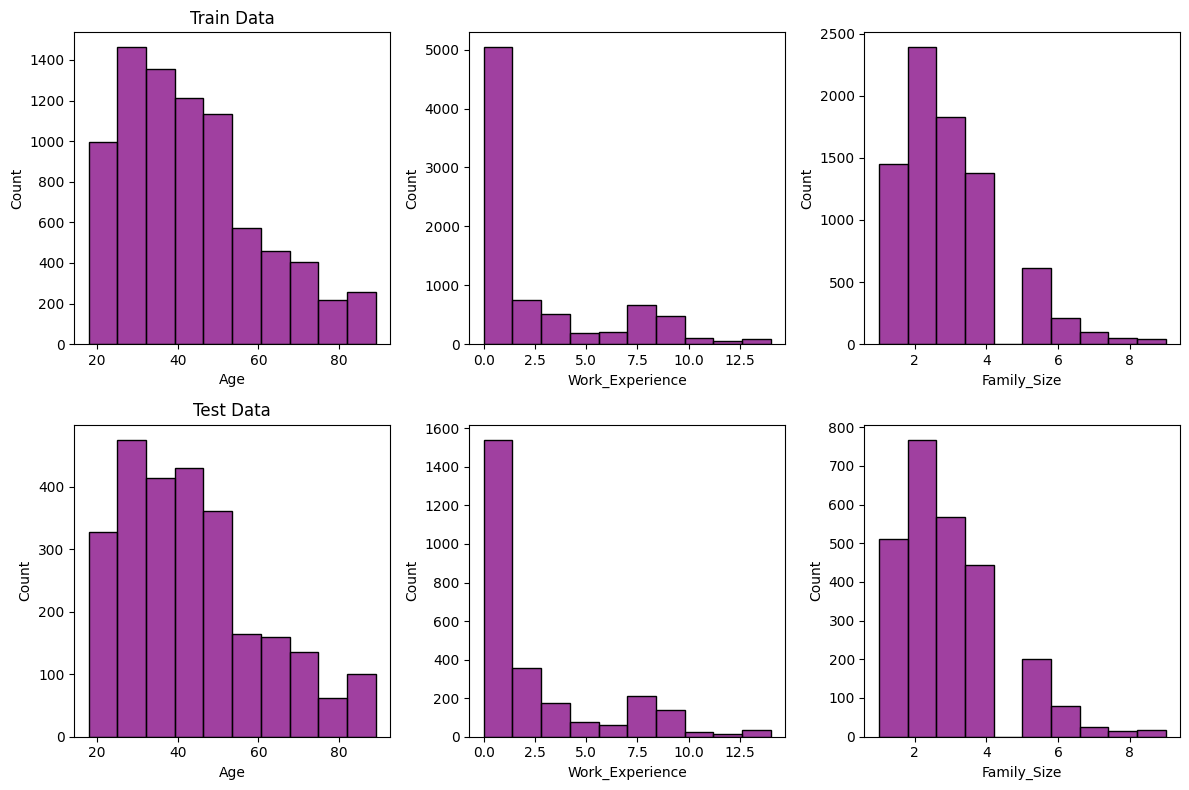

In [14]:
# Create a single figure with 2 rows and 3 columns of histograms
plt.figure(figsize=(12, 8))

# Plot histograms for train_data
plt.subplot(2, 3, 1)
sns.histplot(data=train_data, x=numerical_cols[0], bins=10, color="purple")
plt.title('Train Data')

plt.subplot(2, 3, 2)
sns.histplot(data=train_data, x=numerical_cols[1], bins=10, color="purple")

plt.subplot(2, 3, 3)
sns.histplot(data=train_data, x=numerical_cols[2], bins=10, color="purple")

# Plot histograms for test_data
plt.subplot(2, 3, 4)
sns.histplot(data=test_data, x=numerical_cols[0], bins=10, color="purple")
plt.title('Test Data')

plt.subplot(2, 3, 5)
sns.histplot(data=test_data, x=numerical_cols[1], bins=10, color="purple")

plt.subplot(2, 3, 6)
sns.histplot(data=test_data, x=numerical_cols[2], bins=10, color="purple")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [15]:
categorical_cols

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

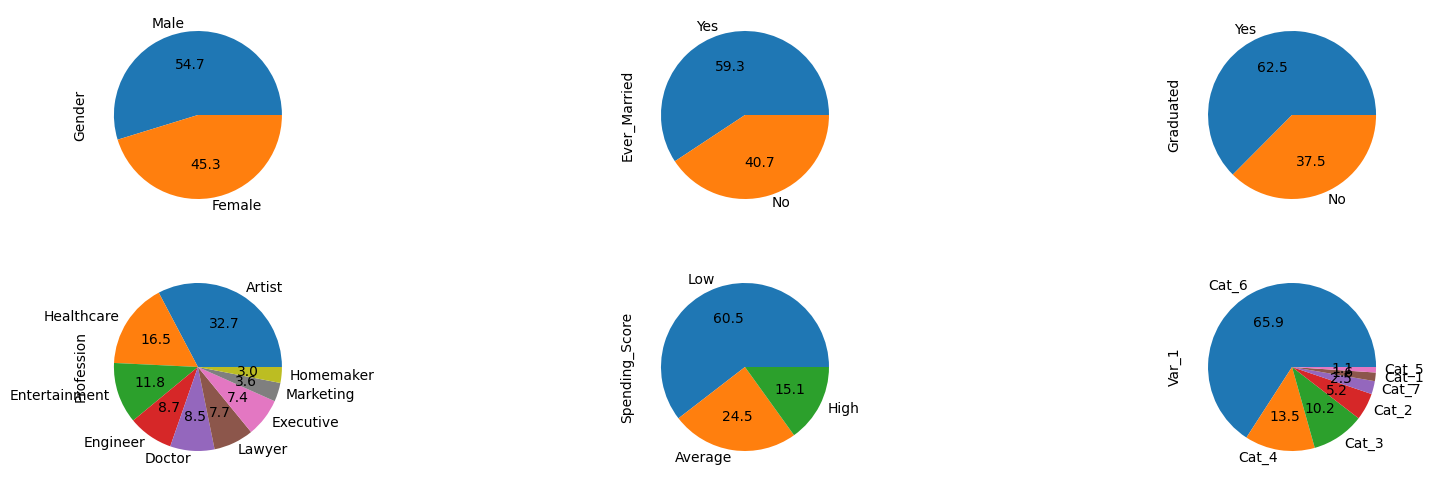

In [16]:
plt.figure(figsize=(20,6))
for i,col in enumerate(categorical_cols):
    plt.subplot(2,3,i+1)
    train_data[col].value_counts().plot(kind="pie",autopct="%.1f")
plt.show()

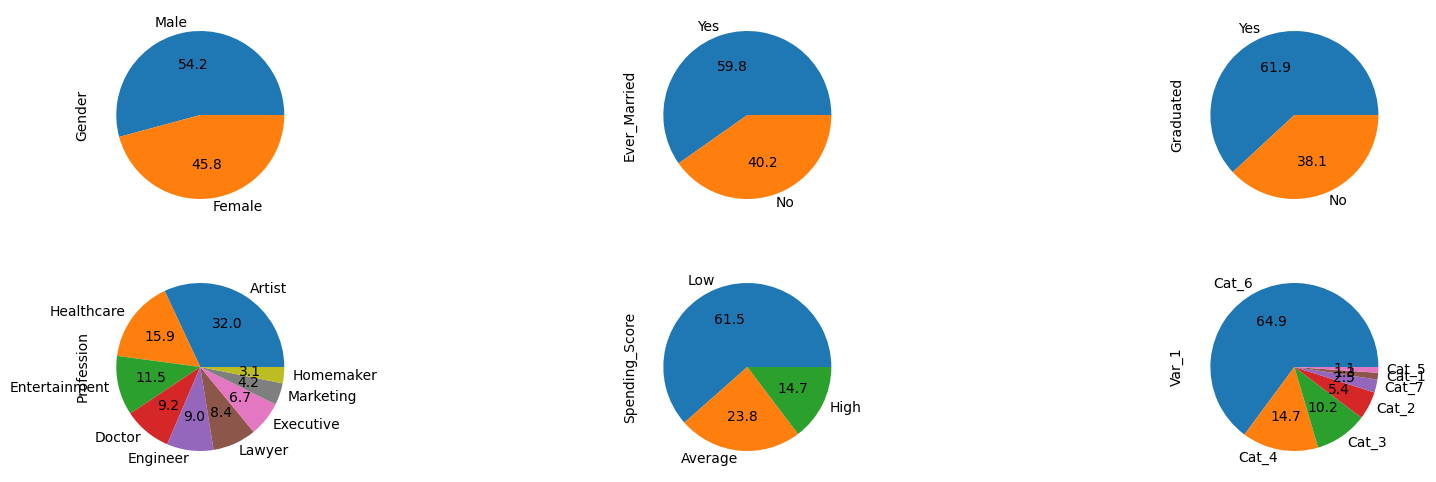

In [17]:
plt.figure(figsize=(20,6))
for i,col in enumerate(categorical_cols):
    plt.subplot(2,3,i+1)
    test_data[col].value_counts().plot(kind="pie",autopct="%.1f")
plt.show()

## 3. Encoding

Gender, Ever_Married, Graduated, Profession, Var_1, and Segmentation are all nominal variable


Spending_Score is an ordinal variable

We like onehot encoder more than OrdinalEncoder because we can compare correlation more

In [19]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Create an instance of OrdinalEncoder
ordinal_encoder = ce.OrdinalEncoder()


for col in categorical_cols:
    if col == "Spending_Score":
        test_data = pd.get_dummies(test_data, columns=['Spending_Score'])
    else:
        test_data[col] = label_encoder.fit_transform(test_data[col])


categorical_cols.append("Segmentation")
# Fit and transform the variables
for col in categorical_cols:
    if col == "Spending_Score":
        train_data = pd.get_dummies(train_data, columns=['Spending_Score'])
    else:
        train_data[col] = label_encoder.fit_transform(train_data[col])


In [20]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,Segmentation,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,462809,1,0,22.0,0,5,1.000000,4.0,3,3,0,0,1
1,462643,0,1,38.0,1,2,2.513538,3.0,3,0,1,0,0
2,466315,0,1,67.0,1,2,1.000000,1.0,5,1,0,0,1
3,461735,1,1,67.0,1,7,0.000000,2.0,5,1,0,1,0
4,462669,0,1,40.0,1,3,2.513538,6.0,5,0,0,1,0


Correlation matrix 

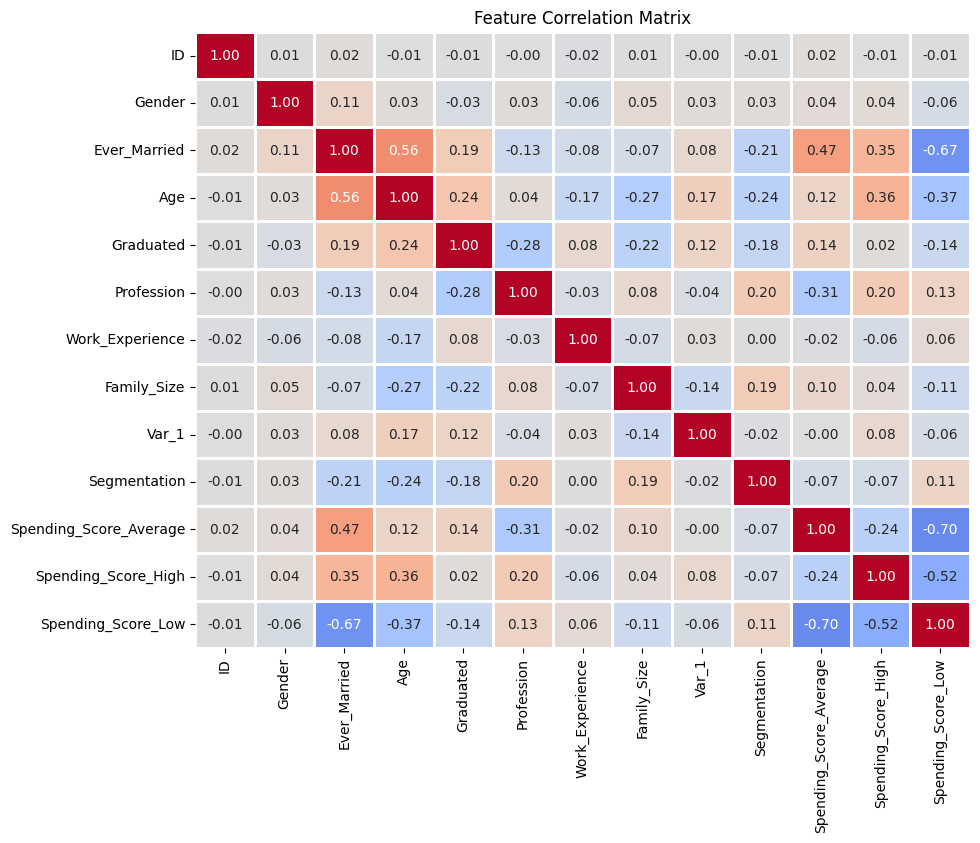

In [21]:
# Compute the correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5,square=False,lw=2,cbar=False,vmin=-1,vmax=1,center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## 4. Models

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X = train_data.drop(columns=["Segmentation"])
y = train_data["Segmentation"]

In [40]:

# Create a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "XGBClassifier" : XGBClassifier(random_state=42,learning_rate=0.1,n_jobs=-1,max_depth=15,n_estimators=1000,objective="multi:softproba")
}

# Dictionary to store the cross-validation scores
cv_scores = {}

# Cross-validation and store the results
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    cv_scores[name] = scores

pd.DataFrame(cv_scores).mean()

Logistic Regression       0.493679
Random Forest             0.509544
Support Vector Machine    0.525903
XGBClassifier             0.518595
dtype: float64